## 신용 데이터 전처리3

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_df = pd.read_csv('cs-training.csv')
test_df = pd.read_csv('cs-test.csv')

## 간단한 데이터 정보 확인

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

Some of the observations are:
- We see in the training data, that all the datatypes belong to a numeric class i.e. int and float.
- Columns MonthlyIncome and NumberOfDependents have some null values

In [5]:
train_df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


From here we can conclude that the column Unnamed: 0 will have no significance in the predictive modelling because it represents ID of the customer,  
(한마디로, Unnamed 열은 신원을 나타내는 변수란 의미다.)

### test data도 똑같은 절차로 확인해준다.

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            101503 non-null  int64  
 1   SeriousDlqin2yrs                      0 non-null       float64
 2   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 3   age                                   101503 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 5   DebtRatio                             101503 non-null  float64
 6   MonthlyIncome                         81400 non-null   float64
 7   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 8   NumberOfTimes90DaysLate               101503 non-null  int64  
 9   NumberRealEstateLoansOrLines          101503 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 11  

MonthlyIncome과 NumberOfDependents에 결측치가 있음을 알 수 있다.

In [7]:
test_df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,101503.000000,0.0,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,50752.000000,NaN,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,29301.536524,NaN,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,1.000000,NaN,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25376.500000,NaN,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,50752.000000,NaN,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,76127.500000,NaN,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,101503.000000,NaN,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


### 원래의 데이터를 건드리지 않고 작업을 할 수 있게 복사본을 생성.

In [12]:
final_train = train_df.copy()
final_test = test_df.copy()

In [13]:
final_test.drop('SeriousDlqin2yrs', axis=1, inplace = True)

In [14]:
trainID = final_train['Unnamed: 0']
testID = final_test['Unnamed: 0']

final_train.drop('Unnamed: 0', axis=1, inplace=True)
final_test.drop('Unnamed: 0', axis=1, inplace=True)

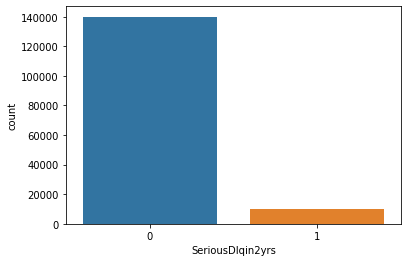

In [15]:
sns.countplot('SeriousDlqin2yrs',data=final_train)
plt.show()

We cannot rely on the accuracy scores to predict the model's success. Many other evaluation metrics would be considered here. But more on that later.

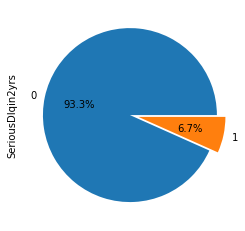

In [16]:
final_train['SeriousDlqin2yrs'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%')
plt.show()

좀 허접하긴 하지만 데이터의 비율이 음성이 93.3%. 양성이 6.7%인 것을 알 수 있다. 비율을 보니깐 14:1인데 임계값도 이를 고려해서 정하면 좋지 않을까 생각한다.

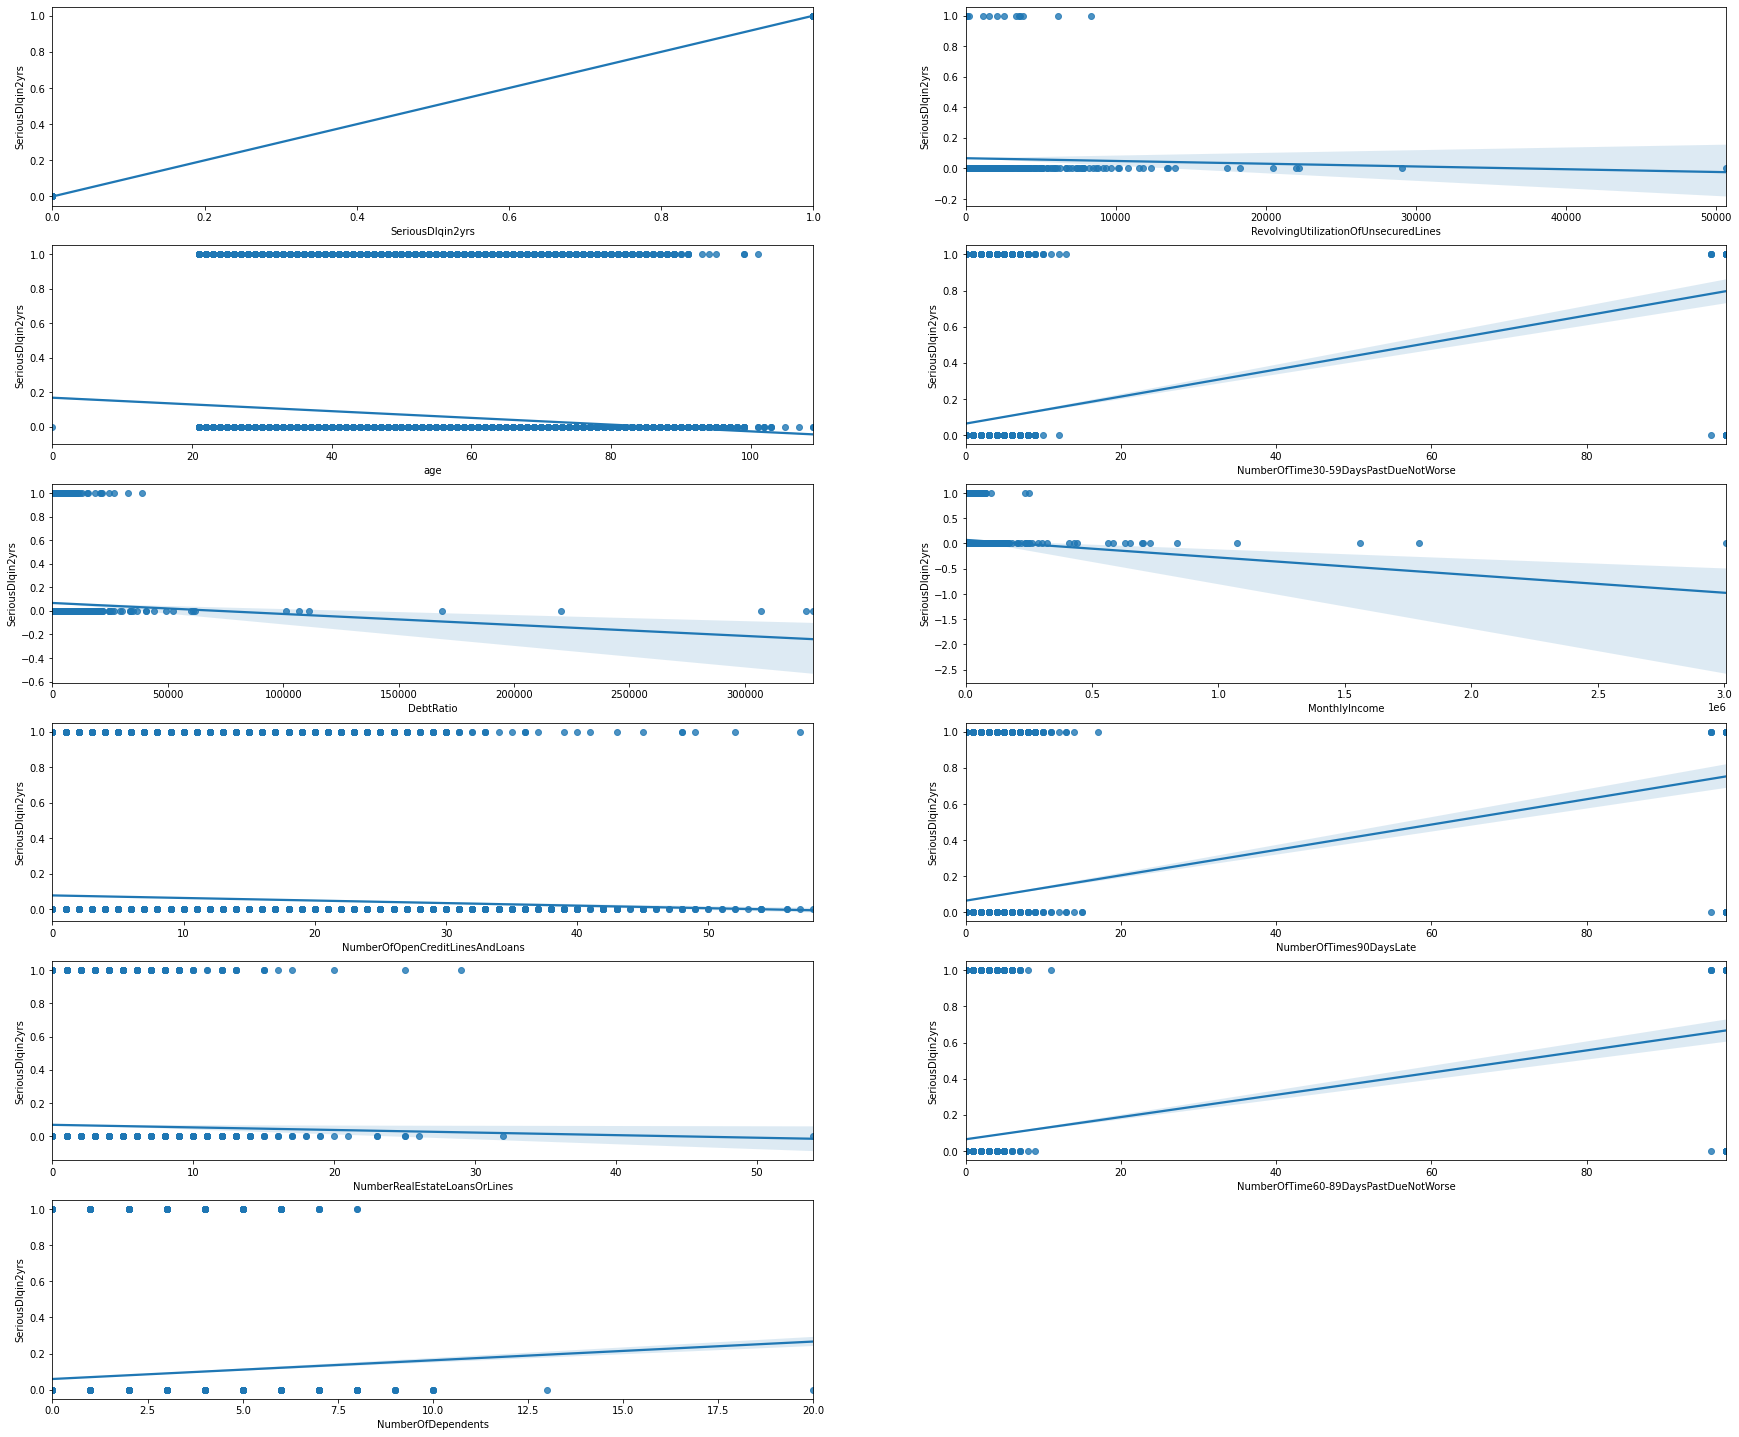

In [17]:
fig = plt.figure(figsize=[30,30])
for col, i in zip(final_train.columns,range(1,13)):
    axes = fig.add_subplot(7,2,i)
    sns.regplot(final_train[col],final_train.SeriousDlqin2yrs,ax=axes)
plt.show()

 NumberOfTime30-59DaysPastDueNotWorse , NumberOfTime60-89DaysPastDueNotWorse and NumberOfTimes90DaysLate 변수에 몇몇 이상치들이 있는 것으로 보이고 DebtRatio랑 RevolvingUtilizationOfUnsecuredLines에 비정상적으로 큰 값을 가진 데이터들이 보인다.

## Step 1: Fixing the columns NumberOfTime30-59DaysPastDueNotWorse , NumberOfTime60-89DaysPastDueNotWorse and NumberOfTimes90DaysLate

In [18]:
# NumberOfTime30-59DaysPastDueNotWorse 변수의 값의 종류를 확인하고 분류해주자.
print(np.unique(final_train[final_train['NumberOfTime30-59DaysPastDueNotWorse']>=90]['NumberOfTime30-59DaysPastDueNotWorse']))
print(np.unique(final_train[final_train['NumberOfTime30-59DaysPastDueNotWorse']>=90]['NumberOfTime60-89DaysPastDueNotWorse']))
print(np.unique(final_train[final_train['NumberOfTime30-59DaysPastDueNotWorse']>=90]['NumberOfTimes90DaysLate']))
print(np.unique(final_train[final_train['NumberOfTime30-59DaysPastDueNotWorse']<90]['NumberOfTime30-59DaysPastDueNotWorse']))
print(np.unique(final_train[final_train['NumberOfTime30-59DaysPastDueNotWorse']<90]['NumberOfTime60-89DaysPastDueNotWorse']))
print(np.unique(final_train[final_train['NumberOfTime30-59DaysPastDueNotWorse']<90]['NumberOfTimes90DaysLate']))

print("Proportion of positive class with special 96/98 values:",
      round(final_train[final_train['NumberOfTime30-59DaysPastDueNotWorse']>=90]['SeriousDlqin2yrs'].sum()*100/
      len(final_train[final_train['NumberOfTime30-59DaysPastDueNotWorse']>=90]['SeriousDlqin2yrs']),2),'%')

[96 98]
[96 98]
[96 98]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
[ 0  1  2  3  4  5  6  7  8  9 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17]
Proportion of positive class with special 96/98 values: 54.65 %


NumberOfTime30-59DaysPastDueNotWorse 열에서 90보다 큰 값이 나오면 다른 열에서도 동일한 값들(96, 98)이 나온다. 그리고 96, 98의 값을 가진 샘플들 중에서 54%가 양성(1)을 가지므로 자칫 오류로 보일 수 있는 상황이다. 그래서 이들을 11, 13, 17로 변경할 것이다.

In [19]:
final_train.loc[final_train['NumberOfTime30-59DaysPastDueNotWorse'] >= 90, 'NumberOfTime30-59DaysPastDueNotWorse'] = 13
final_train.loc[final_train['NumberOfTime60-89DaysPastDueNotWorse'] >= 90, 'NumberOfTime60-89DaysPastDueNotWorse'] = 11
final_train.loc[final_train['NumberOfTimes90DaysLate'] >= 90, 'NumberOfTimes90DaysLate'] = 17

print(np.unique(final_train['NumberOfTime30-59DaysPastDueNotWorse']))
print(np.unique(final_train['NumberOfTime60-89DaysPastDueNotWorse']))
print(np.unique(final_train['NumberOfTimes90DaysLate']))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
[ 0  1  2  3  4  5  6  7  8  9 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17]


### test data도 똑같은 절차로 확인해준다.

In [20]:
print(np.unique(final_test[final_test['NumberOfTime30-59DaysPastDueNotWorse']>=90]['NumberOfTime30-59DaysPastDueNotWorse']))
print(np.unique(final_test[final_test['NumberOfTime30-59DaysPastDueNotWorse']>=90]['NumberOfTime60-89DaysPastDueNotWorse']))
print(np.unique(final_test[final_test['NumberOfTime30-59DaysPastDueNotWorse']>=90]['NumberOfTimes90DaysLate']))
print(np.unique(final_test[final_test['NumberOfTime30-59DaysPastDueNotWorse']<90]['NumberOfTime30-59DaysPastDueNotWorse']))
print(np.unique(final_test[final_test['NumberOfTime30-59DaysPastDueNotWorse']<90]['NumberOfTime60-89DaysPastDueNotWorse']))
print(np.unique(final_test[final_test['NumberOfTime30-59DaysPastDueNotWorse']<90]['NumberOfTimes90DaysLate']))

[96 98]
[96 98]
[96 98]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 19]
[0 1 2 3 4 5 6 7 8 9]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 16 17 18]


In [21]:
final_test.loc[final_test['NumberOfTime30-59DaysPastDueNotWorse'] >= 90, 'NumberOfTime30-59DaysPastDueNotWorse'] = 13
final_test.loc[final_test['NumberOfTime60-89DaysPastDueNotWorse'] >= 90, 'NumberOfTime60-89DaysPastDueNotWorse'] = 11
final_test.loc[final_test['NumberOfTimes90DaysLate'] >= 90, 'NumberOfTimes90DaysLate'] = 17

print(np.unique(final_test['NumberOfTime30-59DaysPastDueNotWorse']))
print(np.unique(final_test['NumberOfTime60-89DaysPastDueNotWorse']))
print(np.unique(final_test['NumberOfTimes90DaysLate']))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 19]
[ 0  1  2  3  4  5  6  7  8  9 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 16 17 18]


## Step 2: Checking for DebtRatio and RevolvingUtilizationOfUnsecuredLines.

In [22]:
print('Debt Ratio: \n',final_train['DebtRatio'].describe())
print('\nRevolving Utilization of Unsecured Lines: \n',final_train['RevolvingUtilizationOfUnsecuredLines'].describe())

Debt Ratio: 
 count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

Revolving Utilization of Unsecured Lines: 
 count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64


여기서 3분위수와 최대치의 격차가 매우 크다는 것이다. 이를 좀 더 탐구해 봐야된다.

In [23]:
# 75%부터 값을 확인해보고 이상치를 판별하겠다.
quantiles = [0.75,0.8,0.81,0.85,0.9,0.95,0.975,0.99]

for i in quantiles:
    print(i*100,'% quantile of debt ratio is: ',final_train.DebtRatio.quantile(i))

75.0 % quantile of debt ratio is:  0.86825377325
80.0 % quantile of debt ratio is:  4.0
81.0 % quantile of debt ratio is:  14.0
85.0 % quantile of debt ratio is:  269.1499999999942
90.0 % quantile of debt ratio is:  1267.0
95.0 % quantile of debt ratio is:  2449.0
97.5 % quantile of debt ratio is:  3489.024999999994
99.0 % quantile of debt ratio is:  4979.040000000037


81%일 때부터 값이 매우 크게 상승해서 81%부터 제외하고 그 영향력을 확인할까 했지만 데이터 자체가 15만개다 보니 95%나 97.5% 이상의 값을 제외하고 그 영향에 대해 알아보기로 한다. 

In [24]:
final_train[final_train['DebtRatio'] >= final_train['DebtRatio'].quantile(0.95)][['SeriousDlqin2yrs','MonthlyIncome']].describe()

,SeriousDlqin2yrs,MonthlyIncome
count,7501.000000,379.000000
mean,0.055193,0.084433
std,0.228371,0.278403
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [25]:
final_train[(final_train["DebtRatio"] > final_train["DebtRatio"].quantile(0.95)) & (final_train['SeriousDlqin2yrs'] == final_train['MonthlyIncome'])]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
50,0,0.818978,73,0,3095.0,0.0,9,0,1,1,0.0
73,0,0.059669,31,0,3162.0,0.0,11,0,2,0,1.0
90,0,0.039388,51,0,15466.0,0.0,7,0,0,0,0.0
326,0,0.013115,43,0,4211.0,0.0,21,0,2,0,2.0
508,0,1.000000,73,0,8500.0,0.0,2,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
147523,0,0.666509,50,0,4351.0,0.0,12,0,2,0,2.0
148258,0,0.211955,31,0,2734.0,0.0,9,0,1,0,1.0
148432,0,0.091785,37,0,2752.0,0.0,7,0,2,0,3.0
149383,0,0.239302,63,0,3153.0,0.0,29,0,1,0,0.0


의미를 모르겠음.

### Revolving Utilization of Unsecured Lines

In [26]:
final_train[final_train['RevolvingUtilizationOfUnsecuredLines']>10].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,241.000000,241.000000,241.000000,241.000000,241.000000,173.00000,241.000000,241.000000,241.000000,241.000000,228.000000
mean,0.070539,3564.023932,50.630705,0.186722,571.918644,8467.67052,5.763485,0.074689,1.186722,0.087137,0.688596
std,0.256587,5123.802683,14.565389,0.579502,1772.948412,6564.06825,3.114160,0.579711,1.065750,0.559651,1.038659
min,0.000000,11.385230,24.000000,0.000000,0.000800,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,941.000000,39.000000,0.000000,0.217813,4500.00000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2012.000000,48.000000,0.000000,0.402560,7000.00000,5.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,4116.000000,62.000000,0.000000,59.000000,10091.00000,7.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,87.000000,3.000000,21395.000000,44472.00000,21.000000,8.000000,9.000000,7.000000,4.000000


In [27]:
final_train[final_train['RevolvingUtilizationOfUnsecuredLines']>13].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,238.000000,238.000000,238.000000,238.000000,238.000000,170.000000,238.000000,238.000000,238.000000,238.000000,225.000000
mean,0.058824,3608.797826,50.634454,0.163866,579.117900,8520.041176,5.689076,0.071429,1.176471,0.071429,0.693333
std,0.235790,5140.423232,14.617658,0.522123,1782.962163,6606.889618,3.032170,0.580214,1.064558,0.542637,1.043346
min,0.000000,14.000000,24.000000,0.000000,0.000800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,951.000000,39.000000,0.000000,0.216587,4608.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2023.500000,48.000000,0.000000,0.391176,7000.000000,5.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,4128.750000,62.000000,0.000000,82.250000,10178.750000,7.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,87.000000,3.000000,21395.000000,44472.000000,21.000000,8.000000,9.000000,7.000000,4.000000


In [28]:
final_train = final_train[final_train['RevolvingUtilizationOfUnsecuredLines']<=13]
final_train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


## Null Handling

In [29]:
def MissingHandler(df):
    DataMissing = df.isnull().sum()*100/len(df)
    DataMissingByColumn = pd.DataFrame({'Percentage Nulls':DataMissing})
    DataMissingByColumn.sort_values(by='Percentage Nulls', ascending=False,inplace=True)
    return DataMissingByColumn[DataMissingByColumn['Percentage Nulls']>0]

MissingHandler(final_train)

,Percentage Nulls
MonthlyIncome,19.806760
NumberOfDependents,2.611477


In [30]:
final_train['MonthlyIncome'].fillna(final_train['MonthlyIncome'].median(), inplace=True)
final_train['NumberOfDependents'].fillna(0, inplace = True)

In [31]:
MissingHandler(final_train)

,Percentage Nulls


In [32]:
MissingHandler(final_test)

,Percentage Nulls
MonthlyIncome,19.805326
NumberOfDependents,2.587116


In [33]:
final_test['MonthlyIncome'].fillna(final_train['MonthlyIncome'].median(), inplace=True)
final_test['NumberOfDependents'].fillna(0, inplace = True)

In [34]:
MissingHandler(final_test)

,Percentage Nulls


In [35]:
print(final_train.shape)
print(final_test.shape)

(149762, 11)
(101503, 10)


In [36]:
SeriousDlqIn2Yrs = final_train['SeriousDlqin2yrs']

final_train.drop('SeriousDlqin2yrs', axis = 1 , inplace = True)

In [37]:
final_data = pd.concat([final_train, final_test])

final_data.shape

(251265, 10)

In [38]:
final_data['MonthlyIncomePerPerson'] = final_data['MonthlyIncome']/(final_data['NumberOfDependents']+1)
final_data['MonthlyIncomePerPerson'].fillna(0, inplace=True)

final_data['MonthlyDebt'] = final_data['MonthlyIncome']*final_data['DebtRatio']
final_data['MonthlyDebt'].fillna(final_data['DebtRatio'],inplace=True)
final_data['MonthlyDebt'] = np.where(final_data['MonthlyDebt']==0, final_data['DebtRatio'],final_data['MonthlyDebt'])

final_data['isRetired'] = np.where((final_data['age'] > 65), 1, 0)

final_data['RevolvingLines'] = final_data['NumberOfOpenCreditLinesAndLoans']-final_data['NumberRealEstateLoansOrLines']

final_data['hasRevolvingLines']=np.where((final_data['RevolvingLines']>0),1,0)

final_data['hasMultipleRealEstates'] = np.where((final_data['NumberRealEstateLoansOrLines']>=2),1,0)

final_data['incomeDivByThousand'] = final_data['MonthlyIncome']/1000

In [39]:
MissingHandler(final_data)

,Percentage Nulls


In [40]:
train_df = final_data[:len(final_train)]
test_df = final_data[len(final_train):]
print(train_df.shape)
print(test_df.shape)

(149762, 17)
(101503, 17)


In [41]:
train_df.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'MonthlyIncomePerPerson', 'MonthlyDebt',
       'isRetired', 'RevolvingLines', 'hasRevolvingLines',
       'hasMultipleRealEstates', 'incomeDivByThousand'],
      dtype='object')

## MachineLearning

#### GridCV를 활용한 최적의 파라메터를 탐색하기 위해 Train 데이터 내에서 Train 데이터와 Test 데이터로 나눠준다

In [43]:
y_df = SeriousDlqIn2Yrs
X_df = train_df
X_train,X_test,y_train,y_test = train_test_split(X_df,y_df,test_size=0.2,random_state=0)

#### 첫번째 분류모델. 의사결정나무
##### 데이터 균일도를 바탕으로 규칙기반으로 분류해나가는 방법

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
dt_clf=DecisionTreeClassifier(random_state=0)

In [44]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [46]:
params2={'max_depth':[1,2,3,5,7,10],
       'min_samples_split':[5,10,20]}
grid_cv2=GridSearchCV(dt_clf,param_grid=params2,scoring='roc_auc',cv=5)
grid_cv2.fit(X_train,y_train)
print('GridSearchCV 최고 평균 roc_auc 점수:',grid_cv2.best_score_)
print('GridSearchCV 최적 하이퍼 파라미터:',grid_cv2.best_params_)

GridSearchCV 최고 평균 roc_auc 점수: 0.8477117752810246
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 7, 'min_samples_split': 20}


In [217]:
best_df_clf=grid_cv2.best_estimator_
pred_df=best_df_clf.predict(X_test)
roc_auc=roc_auc_score(pred_df,y_test)
print('결정트리 예측 roc_auc:',roc_auc)

결정트리 예측 roc_auc: 0.7510763041283977


In [243]:
pred_probs=pd.DataFrame(best_df_clf.predict_proba(test_df))[1]
pred_probs.index += 1 
pred_probs.to_csv(r"submit_dctree_data3.csv", index=True)

#### 두번째 분류모델. 랜덤포레스트
##### 랜덤포레스트는 배깅의 한종류로, 같은 알고리즘(의사결정나무)로 여러 개의 분류기를 만들어서 투표를 통해 최종 결정하는 알고리즘. 분류기들에 가중치를 주어 선형결합을 통해 최종 결과를 예측하는 방법에 해당. 쉽게 말해, 기본적인 의사결정나무와는 달리 부트스트랩 방식을 통해 전체데이터에서 중복을 허용하여 n개의 데이터를 추출하고, 또한 피처값 중에서 중복 허용 없이 k개를 추출하여 만든 데이터를 바탕으로 분류기에 넣어 데이터를 예측한다. 이러한 과정을 여러 번 반복하여 여러 개의 분류기에서 나온 결과값을 바탕으로 예측을 진행한다.

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [77]:
params={
    'max_depth':[1,3,5,10],
    'min_samples_leaf':[1,3,5,10],
    'min_samples_split':[1,3,5,10]
    }
#RandomForest를 설정하고 GridSearchCV수행
rf_clf=RandomForestClassifier(random_state=0,n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params,cv=3,n_jobs=-1,scoring='roc_auc')
grid_cv.fit(X_train,y_train)
cv_result=pd.DataFrame(grid_cv.cv_results_)

print('최적 하이퍼 파라미터와 예측 roc_auc 점수:',grid_cv.best_params_,grid_cv.best_score_)

최적 하이퍼 파라미터와 예측 roc_auc 점수: {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 3} 0.863204961909967


##### 추가적으로 더 다양한 파라메터를 고려해보았으나, GridCV에서 점수가 오르는 효과는 있었으나, 과적합 문제로 실제 점수가 떨어지는 효과가 발생하였다. 파라메터를 추가하더라도, 파라메터에 대한 경우의수를 구하기 어려워 여기서 멈추기로함

In [232]:
rf_clf=RandomForestClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=3)
rf_clf.fit(X_train, y_train)
rf_clf_pred = rf_clf.predict(X_test)
roc_auc = roc_auc_score(rf_clf_pred,y_test)
print('랜덤포레스트 예측 roc_auc:',roc_auc)

랜덤포레스트 예측 roc_auc: 0.7843051634178413


In [233]:
#제출 데이터 생성
rf_clf=RandomForestClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=3)
rf_clf.fit(X_train, y_train)
pred_probs=pd.DataFrame(rf_clf.predict_proba(test_df))[1]
rf_wrapper_pred=pd.DataFrame(pred_probs)
rf_wrapper_pred.index += 1 
rf_wrapper_pred.to_csv(r"submit_rf_data3.csv", index=True)

#### 세번째 분류모델. XG부스트(회귀도 가능)
##### 부스팅 알고리즘은 분포에 대해 약한 학습자를 반복적으로 학습시켜 최종적으로 강한 학습자를 만드는 것을 목표로한다. 강한 학습자를 만들기 위해 약한 학습자들의 잔차가 큰 잘못 예측한 데이터에 대해 가중치를 부여하여 예측성을 향상시키고자 한다. 의사결정나무를 기반으로 분석하는 부스팅 기법에는 LightGBM과 XGboost가 있으며, 타 부스팅 기법 대시 분석 소요 시간을 획기적으로 줄이면서도, 예측력은 그대로 유지하고 있거나 더 뛰어나다.

In [234]:
y_org = y_train
X_org = X_train

params={
    'max_depth':[1,3,5,10],
    'learning_rate':[1,3,5,10],
    'n_estimators':[1,3,5,10],
    'random_state':[1,3,5,10]
    }

xgb_wrapper = XGBClassifier()
grid_cv = GridSearchCV(xgb_wrapper, param_grid=params,cv=5,n_jobs=-1,scoring='roc_auc')
grid_cv.fit(X_train,y_train)

cv_result=pd.DataFrame(grid_cv.cv_results_)

print('최적 하이퍼 파라미터와 예측 roc_auc 점수:',grid_cv.best_params_,grid_cv.best_score_)

최적 하이퍼 파라미터와 예측 roc_auc 점수: {'learning_rate': 1, 'max_depth': 3, 'n_estimators': 10, 'random_state': 1} 0.8578684083569662


In [235]:
y_org = y_train
X_org = X_train

import xgboost as xgb
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(learning_rate=1 , max_depth=3, n_estimators=10, random_state=1)
evals=[(X_test,y_test)]
xgb_wrapper.fit(X_org, y_org, early_stopping_rounds=100, eval_metric="logloss",eval_set=evals,verbose=True)
xgb_wrapper_pred = xgb_wrapper.predict(X_test)
print('XGBoost 예측 roc_auc:',roc_auc)

[0]	validation_0-logloss:0.25077
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.19853
[2]	validation_0-logloss:0.18634
[3]	validation_0-logloss:0.18383
[4]	validation_0-logloss:0.18245
[5]	validation_0-logloss:0.18188
[6]	validation_0-logloss:0.18137
[7]	validation_0-logloss:0.18126
[8]	validation_0-logloss:0.18123
[9]	validation_0-logloss:0.18136
XGBoost 예측 roc_auc: 0.7843051634178413


In [224]:
# #임계값을 다르게 해서 점수 확인
# pred_probs=pd.DataFrame(xgb_wrapper.predict_proba(X_test))[1]
# preds = [1 if x>0.5 else 0 for x in pred_probs]
# preds2 = [1 if x>0.7 else 0 for x in pred_probs]
# preds3 = [1 if x>0.1 else 0 for x in pred_probs]
# preds4 = [1 if x>0.05 else 0 for x in pred_probs]

In [225]:
# from sklearn.metrics import roc_auc_score
# roc_auc_score(preds, y_test)

0.7549942946767411

In [226]:
# roc_auc_score(preds2,y_test)

0.7795137034202108

In [227]:
# roc_auc_score(preds3,y_test)

0.6264307238354005

In [228]:
# roc_auc_score( preds4, y_test)

0.5834534157461636

In [236]:
#제출 데이터 생성
pred_probs=pd.DataFrame(xgb_wrapper.predict_proba(test_df))[1]
xgb_wrapper_pred=pd.DataFrame(pred_probs)
xgb_wrapper_pred.index += 1 
xgb_wrapper_pred
xgb_wrapper_pred.to_csv(r"submit_xgboost_data3.csv", index=True)

#### 네번쨰 분류모델. LightGBM
##### XG부스트의 개선 분류모델. XG부스트는 부스팅 모델중에서 상대적으로 빠르긴하나, 여전히 시간이 오래 걸린다는 문제점을 가지고 있습니다. 예측성을 유지하면서도 이러한 문제를 해결한 알고리즘이 LightGBM이다. LightGBM은 대용량 데이터 처리에 적합하며, 메모리 사용량도 적으며, CPU뿐만 아니라 GPU도 활용가능하다. 다만, 너무 적은 양의 데이터에 사용시 과적합 문제가 발생할 가능성이 높다

In [237]:
from lightgbm import LGBMClassifier

In [238]:
params={
    'max_depth':[1,3,5,10],
    'learning_rate':[0.5,1,3,5,10],
    'n_estimators':[1,3,5,10],
    'random_state':[1,3,5,10]
    }

LGBM_wrapper = LGBMClassifier()
grid_cv = GridSearchCV(LGBM_wrapper, param_grid=params,cv=5,n_jobs=-1,scoring='roc_auc')
grid_cv.fit(X_train,y_train)

cv_result=pd.DataFrame(grid_cv.cv_results_)

print('최적 하이퍼 파라미터와 예측 roc_auc 점수:',grid_cv.best_params_,grid_cv.best_score_)

최적 하이퍼 파라미터와 예측 roc_auc 점수: {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 10, 'random_state': 1} 0.8593512858520439


In [239]:
lgbm_wrapper_time=LGBMClassifier(learning_rate=0.5, max_depth=3, n_estimators=10, random_state=1)
evals=[(X_test,y_test)]
lgbm_wrapper_time.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss",eval_set=evals,verbose=True)
lgbm_wrapper_time_preds=lgbm_wrapper_time.predict(X_test)
lgbm_time_roc_auc = roc_auc_score(lgbm_wrapper_time_preds,y_test )
print('LightGBM 최적 파라미터 roc_auc 예측 점수:',lgbm_time_roc_auc)

[1]	valid_0's binary_logloss: 0.203586
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.192361
[3]	valid_0's binary_logloss: 0.188022
[4]	valid_0's binary_logloss: 0.185608
[5]	valid_0's binary_logloss: 0.18432
[6]	valid_0's binary_logloss: 0.183106
[7]	valid_0's binary_logloss: 0.18239
[8]	valid_0's binary_logloss: 0.181849
[9]	valid_0's binary_logloss: 0.181497
[10]	valid_0's binary_logloss: 0.181113
Did not meet early stopping. Best iteration is:
[10]	valid_0's binary_logloss: 0.181113
LightGBM 최적 파라미터 roc_auc 예측 점수: 0.7658810071341612


In [240]:
pred_probs=pd.DataFrame(lgbm_wrapper_time.predict_proba(test_df))[1]
lgbm_wrapper_pred=pd.DataFrame(pred_probs)
lgbm_wrapper_pred.index += 1 
lgbm_wrapper_pred
lgbm_wrapper_pred.to_csv(r"submit_lgbm_data3.csv", index=True)